# Differnt methods of  Converting text data into numerical features 

### Summary:

Bag of Words (BoW): Simple, but ignores word order.

TF-IDF: Weighs words based on their importance.

Word2Vec: Uses dense vectors to capture semantic meaning.

GloVe: Similar to Word2Vec but uses co-occurrence matrices.

FastText: Handles out-of-vocabulary words better.

Doc2Vec: Represents whole documents, not just words.

N-grams: Captures some local context using sequences of words.

### Which Method to Use?

If you need a simple approach, start with TF-IDF or Bag of Words.

For more sophisticated embeddings that capture word semantics, use Word2Vec, GloVe, or FastText.

N-grams can be helpful if you believe word sequences are important.

# Let's do the Text Vectorization via using the TF-IDF: 

Convert text data into numerical features using methods like TF-IDF

In [2]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 6.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.1 MB 9.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.1 MB 9.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.1 MB 9.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.1 MB 9.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.1 MB 10.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.1 MB 10.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.1 MB 10.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.1 MB 10.5 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import necessary libraries:

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

# Difffernt methods of gettting data in this module:

## 1) Option 1: Load the Data in Each Notebook:

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the cleaned data in the second notebook
df = pd.read_csv('../data/processed/cleaned_spam.csv')

# Verify the data is loaded
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Option 2: Use .py Scripts:

In [4]:
import os
print("Notebook working dir:", os.getcwd())

Notebook working dir: c:\Users\naren\Desktop\New_DS\spam_detection\notebook


In [5]:
import sys
sys.path.append('../')  # one level up to access 'source'

from source.data_preprocessing import load_data

# Load the data
df = load_data()
df.head()
df.info()


Resolved path: c:\Users\naren\Desktop\New_DS\spam_detection\data\processed\cleaned_spam.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [6]:

# load your data
df = load_data()
df.head()

Resolved path: c:\Users\naren\Desktop\New_DS\spam_detection\data\processed\cleaned_spam.csv


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Perform Data Preprocessing:

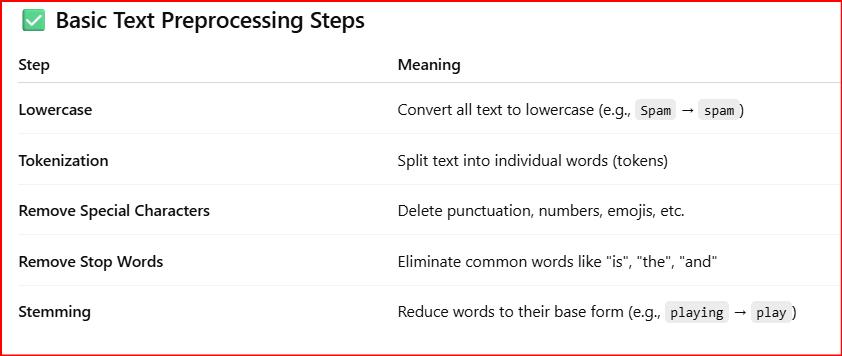

# Lowercasing:


In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Convert all text to lowercase to maintain uniformity (e.g., "Hello" = "hello")
# .str accesses string methods in a vectorized way (meaning for all rows in the column).
# .lower() converts all letters in the text to lowercase.
# Normally, we use to .lower() lowercase only one string.
# However, df['text'] is a Series (column with many strings), not just one string.
# So, we use .str.lower() to apply the lowercase conversion to all strings in the column.
# This is a common preprocessing step in text analysis to ensure consistency in the data.

df['clean_text'] = df['text'].str.lower()

# Remove Punctuation & Special Characters

 import re                  => gives us access to regular expressions

 df['clean_text'].apply     => runs the function on each row of the 'clean_text' column

 lambda x: ...              => a short function where 'x' is each individual message

 re.sub(r'[^a-zA-Z\s]', '', x):

  - r'[^a-zA-Z\s]'         => regex pattern to match any character that is NOT a letter or whitespace

   - ''                     => replace that character with nothing (i.e., remove it)

   - x                      => the text message being cleaned

\s: any whitespace character: Includes: spaces, tabs, newlines

Inside square brackets [^...] → Negation: match anything except the characters listed

re.sub(pattern, replacement, text)

pattern: What you want to find (using regex)

replacement: What you want to replace it with

text: The string to apply it on

re.sub(pattern, replacement, text)b: In Python’s re module, re.sub() stands for "substitute". It replaces parts of a string that match a pattern with something else.



In [9]:
import re  # Import Python's regular expressions module

# Use regex to remove everything that's not a letter or space
# We're updating the 'clean_text' column by applying a cleaning function to each row
df['clean_text'] = df['text'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', x)  # Remove everything except letters and spaces
)
# The regex pattern r'[^a-zA-Z\s]' means:
# - [^...] means "not any of these characters"
# - a-z means "any lowercase letter from a to z"
# - A-Z means "any uppercase letter from A to Z"
# - \s means "any whitespace character (like space, tab, newline)"
# So, this pattern matches any character that is NOT a letter or whitespace.
# The re.sub function replaces all occurrences of this pattern in the text with an empty string (i.e., removes them).
# This effectively cleans the text by removing numbers, punctuation, and special characters.
# The result is stored back in the 'clean_text' column of the DataFrame.
# Regex: keep only letters (a-z, A-Z) and whitespace (\s) #sub: substitute everything else with an empty string
    # The lambda function takes each row (x) and applies the regex substitution

# Tokenization

In [10]:
# ✅ Split the sentence into individual words (called tokens)
# - df['clean_text']: selects the column with cleaned text (as strings)
# - .apply(...): applies a function to each row (each sentence)
# - lambda x: x.split(): splits the sentence (x) into a list of words
#     - .split() by default splits on spaces
#     - turns "hello world" ➝ ["hello", "world"]

df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
# This step is important for text analysis because it breaks down the text into manageable pieces (words) for further processing.
# ✅ Remove stop words (common words that don't add much meaning, like "the", "is", "and")

#  Removing stopwords

In [11]:
pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------- -------------------- 20.5/41.5 kB ? eta -:--:--
     -------------------------------------- 41.5/41.5 kB 666.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 6.5 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 10.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/274.1 kB ? eta -:--:--
   ------------------------------------- -- 256.0/274.1 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 274.1/274.1 kB 4.2 MB/s eta 0:00:00
   ---------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 # Apply logic to remove stopwords from each list of tokens

 - df['clean_text']: access the column of tokenized words
 - .apply(...): run the lambda function on each row
 - lambda x: [word for word in x if word not in stop_words]
    - this is a list comprehension
     - it keeps only the words that are NOT in the stop_words list

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords from nltk (natural language toolkit)
# Get the list of stop words in English
stop_words = set(stopwords.words('english')) # Load the list of English stopwords
#  Remove stop words from the cleaned text
df['clean_text'] = df['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Convert label to numbers (Target):

In [12]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [13]:
df.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, wkly, comp, win, FA, Cup, final,..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, dont, think, goes, usf, lives, around..."


# Add Text Length Feature

In [14]:
# Count number of words in clean_text list
df['text_length'] = df['clean_text'].apply(len)
df.head()

,label,text,clean_text,text_length
0,0,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n...",16
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, wkly, comp, win, FA, Cup, final,...",20
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]",9
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, dont, think, goes, usf, lives, around...",9


# Split the data into training and testing sets:

In [15]:
# Split Data: Split your data into features (X) and labels (y), then into training and test sets.
from sklearn.model_selection import train_test_split

X = df['text']           # Features (messages)
y = df['label']          # Labels (0 = ham, 1 = spam)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The random_state parameter ensures that the split is reproducible.
# This means that every time you run the code, you'll get the same split of data into training and test sets.

# Text Vectorization (TF-IDF)

Choose a method to convert text to numbers. Start with TF-IDF:

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [17]:
df.head()

,label,text,clean_text,text_length
0,0,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n...",16
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, wkly, comp, win, FA, Cup, final,...",20
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]",9
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, dont, think, goes, usf, lives, around...",9
